In [1]:

# importing libraries to be used in the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import streamlit as st
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
import joblib
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
data = pd.read_csv('Uganda_imports_train.csv')

In [3]:
data.head(5)

,HS_Code,Item_Description,Country_of_Origin,Port_of_Shipment,Quantity,Quantity_Unit,Net_Mass_kg,Gross_Mass_kg,FOB_Value_USD,Freight_USD,...,Mode_of_Transport,Year,Month,Invoice_Amount,Valuation_Method,Value_per_kg,Value_per_unit,FOB_per_kg,Freight_per_kg,Insurance_per_kg
0,30049099,Generic pharmaceutical products,China,Port Bell,482.42,kg,2220.29375,2403.42875,2352.84,220.04,...,Water,2021,11,9671924.57,Deductive Value Method (DVM),4356.146375,20048.763671,1.059698,0.099104,0.021173
1,30049099,Generic pharmaceutical products,China,Entebbe Airport,131.97,liters,348.67000,377.42000,2084.10,169.47,...,Air,2022,11,8412978.38,Computed Value Method (CVM),24128.770413,63749.173145,5.977285,0.486047,0.048871
2,15079090,Vegetable fats and oils,Germany,Entebbe Airport,113.44,pairs,449.93000,487.04000,2759.84,151.30,...,Air,2022,3,10672562.76,Transaction Value of Similar Goods (TVSG),23720.495988,94081.124471,6.133932,0.336275,0.118818
3,10063010,Milled rice,India,Busia,230.52,units,808.09000,874.73000,2917.65,214.86,...,Land,2023,4,11692581.49,Computed Value Method (CVM),14469.405004,50722.633568,3.610551,0.265886,0.049945
4,84089010,Industrial machinery parts,Saudi Arabia,Entebbe Airport,341.70,boxes,896.63000,970.58000,6971.39,366.85,...,Air,2021,6,26519078.57,Computed Value Method (CVM),29576.390005,77609.243693,7.775102,0.409143,0.147932


In [4]:
data.columns

Index(['HS_Code', 'Item_Description', 'Country_of_Origin', 'Port_of_Shipment',
       'Quantity', 'Quantity_Unit', 'Net_Mass_kg', 'Gross_Mass_kg',
       'FOB_Value_USD', 'Freight_USD', 'Insurance_USD', 'CIF_Value_USD',
       'CIF_Value_UGX', 'Unit_Price_UGX', 'Tax_Rate', 'Currency_Code',
       'Mode_of_Transport', 'Year', 'Month', 'Invoice_Amount',
       'Valuation_Method', 'Value_per_kg', 'Value_per_unit', 'FOB_per_kg',
       'Freight_per_kg', 'Insurance_per_kg'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70734 entries, 0 to 70733
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   HS_Code            70734 non-null  int64  
 1   Item_Description   70734 non-null  object 
 2   Country_of_Origin  70734 non-null  object 
 3   Port_of_Shipment   70734 non-null  object 
 4   Quantity           70734 non-null  float64
 5   Quantity_Unit      70734 non-null  object 
 6   Net_Mass_kg        70734 non-null  float64
 7   Gross_Mass_kg      70734 non-null  float64
 8   FOB_Value_USD      70734 non-null  float64
 9   Freight_USD        70734 non-null  float64
 10  Insurance_USD      70734 non-null  float64
 11  CIF_Value_USD      70734 non-null  float64
 12  CIF_Value_UGX      70734 non-null  float64
 13  Unit_Price_UGX     70734 non-null  float64
 14  Tax_Rate           70734 non-null  float64
 15  Currency_Code      70734 non-null  object 
 16  Mode_of_Transport  707

In [7]:
data.shape

(70734, 26)

In [8]:
data.describe()

,HS_Code,Quantity,Net_Mass_kg,Gross_Mass_kg,FOB_Value_USD,Freight_USD,Insurance_USD,CIF_Value_USD,CIF_Value_UGX,Unit_Price_UGX,Tax_Rate,Year,Month,Invoice_Amount,Value_per_kg,Value_per_unit,FOB_per_kg,Freight_per_kg,Insurance_per_kg
count,7.073400e+04,70734.000000,70734.000000,70734.000000,70734.000000,70734.000000,70734.000000,70734.000000,7.073400e+04,70734.000000,70734.000000,70734.000000,70734.000000,7.073400e+04,7.073400e+04,70734.000000,70734.000000,70734.000000,70734.000000
mean,4.191993e+07,316.510484,725.907965,785.779035,4306.905577,330.521006,47.082765,4685.703125,1.733099e+07,151323.881453,0.155317,2021.998544,6.531003,1.733099e+07,1.042552e+05,152333.300339,25.923694,1.980020,0.285443
std,2.955857e+07,306.911935,746.192715,807.739029,1836.714353,237.017189,30.995732,2006.422692,7.435594e+06,163745.993050,0.065433,1.413568,3.449242,7.435594e+06,2.004837e+05,162888.295994,49.830173,4.480517,0.625399
min,1.006301e+07,5.250000,2.420000,2.610000,43.470000,1.770000,0.250000,49.930000,1.853126e+05,62.200000,0.050000,2020.000000,1.000000,1.853126e+05,2.483073e+02,692.502512,0.061330,0.001396,0.000270
25%,1.507909e+07,77.900000,151.880000,164.410000,2942.237500,138.342500,22.060000,3200.717500,1.182828e+07,31865.052500,0.100000,2021.000000,4.000000,1.182828e+07,1.408066e+04,32822.002855,3.493699,0.217043,0.033514
50%,3.004910e+07,183.175000,391.195000,423.455000,4203.455000,281.020000,40.760000,4566.110000,1.685398e+07,86718.700000,0.180000,2022.000000,7.000000,1.685398e+07,4.054190e+04,86718.700353,10.079780,0.630055,0.094873
75%,8.408901e+07,467.955000,1099.807500,1190.507500,5548.965000,474.597500,65.840000,6037.455000,2.233353e+07,214177.600000,0.200000,2023.000000,10.000000,2.233353e+07,1.098421e+05,214112.974849,27.311533,1.910924,0.277713
max,8.703232e+07,938.506250,2220.293750,2403.428750,9679.160000,1011.136250,135.630000,10532.156250,3.896148e+07,729221.440000,0.250000,2024.000000,12.000000,3.896148e+07,3.559754e+06,729221.439855,882.133127,115.513932,14.575691


In [9]:
data.nunique()

HS_Code                 10
Item_Description        10
Country_of_Origin       10
Port_of_Shipment         4
Quantity             35402
Quantity_Unit            6
Net_Mass_kg          45867
Gross_Mass_kg        46355
FOB_Value_USD        67130
Freight_USD          45186
Insurance_USD        12060
CIF_Value_USD        67229
CIF_Value_UGX        70619
Unit_Price_UGX       70646
Tax_Rate                 6
Currency_Code            1
Mode_of_Transport        3
Year                     5
Month                   12
Invoice_Amount       70619
Valuation_Method         6
Value_per_kg         70722
Value_per_unit       70720
FOB_per_kg           70679
Freight_per_kg       70085
Insurance_per_kg     67551
dtype: int64

## EXPLAROTORY DATA ANALYSIS

In [10]:
# checking for missing values
data.isnull().sum()

HS_Code              0
Item_Description     0
Country_of_Origin    0
Port_of_Shipment     0
Quantity             0
Quantity_Unit        0
Net_Mass_kg          0
Gross_Mass_kg        0
FOB_Value_USD        0
Freight_USD          0
Insurance_USD        0
CIF_Value_USD        0
CIF_Value_UGX        0
Unit_Price_UGX       0
Tax_Rate             0
Currency_Code        0
Mode_of_Transport    0
Year                 0
Month                0
Invoice_Amount       0
Valuation_Method     0
Value_per_kg         0
Value_per_unit       0
FOB_per_kg           0
Freight_per_kg       0
Insurance_per_kg     0
dtype: int64

In [11]:
# checking for duplicates
data.duplicated().sum()

0

## DETECTING OUTLIERS

<Axes: >

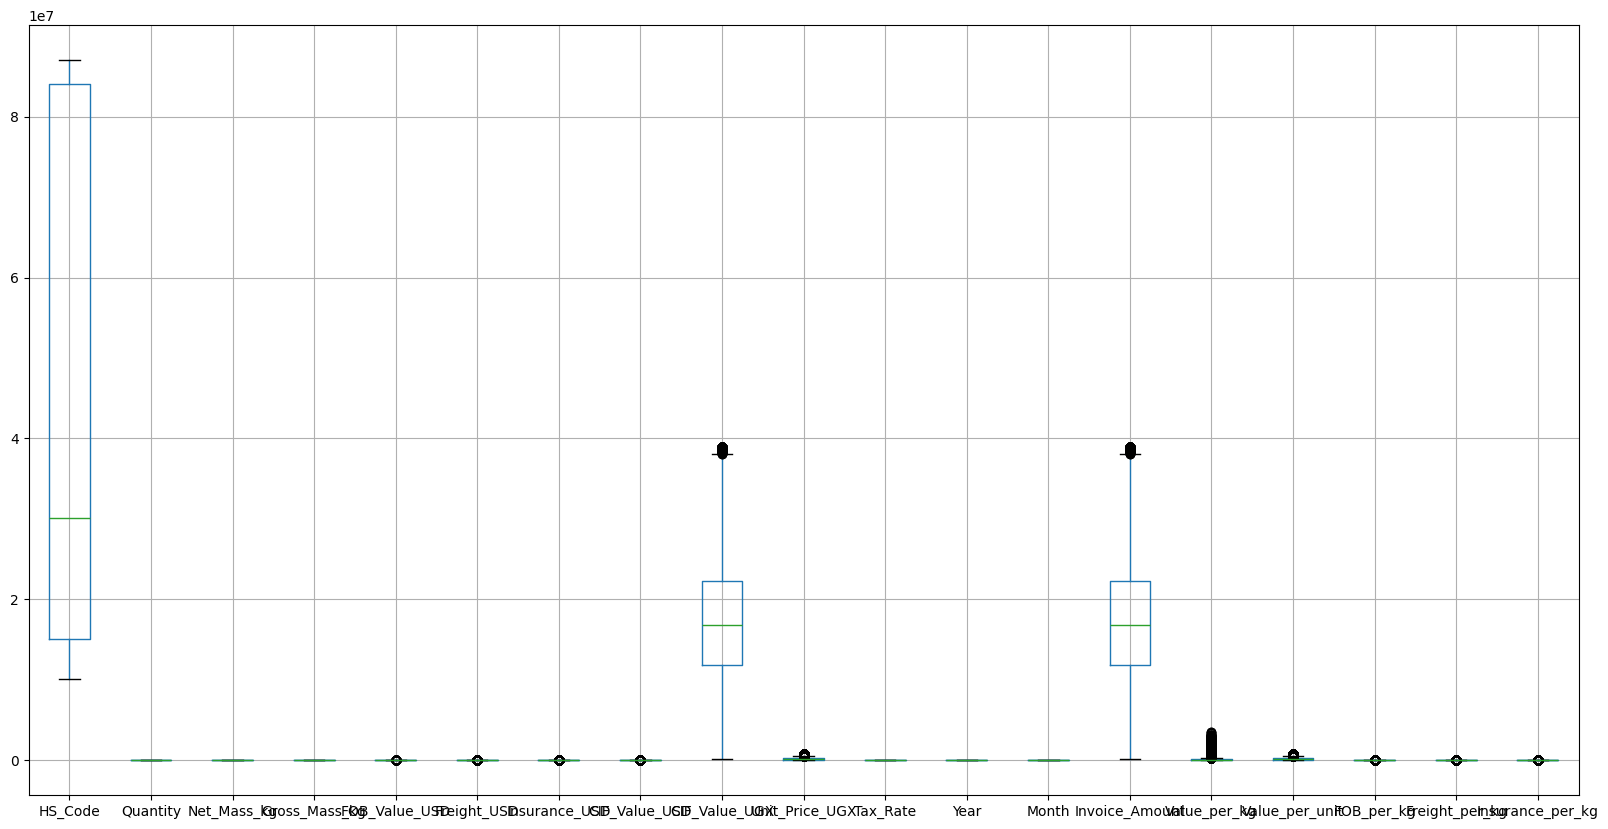

In [ ]:
#checking for outliers in the dataset
data.boxplot(figsize=(20, 10))

In [13]:
# show numeric columns in the dataset
data.select_dtypes(include=[np.number]).columns.tolist()

['HS_Code',
 'Quantity',
 'Net_Mass_kg',
 'Gross_Mass_kg',
 'FOB_Value_USD',
 'Freight_USD',
 'Insurance_USD',
 'CIF_Value_USD',
 'CIF_Value_UGX',
 'Unit_Price_UGX',
 'Tax_Rate',
 'Year',
 'Month',
 'Invoice_Amount',
 'Value_per_kg',
 'Value_per_unit',
 'FOB_per_kg',
 'Freight_per_kg',
 'Insurance_per_kg']

In [15]:
data.select_dtypes(include=['object', 'category']).columns.tolist()

['Item_Description',
 'Country_of_Origin',
 'Port_of_Shipment',
 'Quantity_Unit',
 'Currency_Code',
 'Mode_of_Transport',
 'Valuation_Method']

In [17]:
# List of numeric columns provided
numeric_columns = [
    'HS_Code', 'Quantity', 'Net_Mass_kg', 'Gross_Mass_kg',
    'FOB_Value_USD', 'Freight_USD', 'Insurance_USD',
    'CIF_Value_USD', 'CIF_Value_UGX', 'Unit_Price_UGX',
    'Tax_Rate', 'Year', 'Month', 'Invoice_Amount',
    'Value_per_kg', 'Value_per_unit', 'FOB_per_kg',
    'Freight_per_kg', 'Insurance_per_kg'
]

# Detect outliers and generate summary messages
def iqr_outlier_summary(data, columns):
    results = []
    for col in columns:
        if col in data.columns:
            Q1 = data[col].quantile(0.25)
            Q3 = data[col].quantile(0.75)
            IQR = Q3 - Q1
            lower = Q1 - 1.5 * IQR
            upper = Q3 + 1.5 * IQR
            outliers = data[(data[col] < lower) | (data[col] > upper)]
            count = len(outliers)
            if count > 0:
                percentage = round((count / len(data)) * 100, 2)
                results.append(f"{col} ---- has {count} outliers. Their percentage on the overall dataset is {percentage}%.")
    return results

# Run the function on the dataframe
outlier_messages = iqr_outlier_summary(data, numeric_columns)
outlier_messages


['FOB_Value_USD ---- has 103 outliers. Their percentage on the overall dataset is 0.15%.',
 'Freight_USD ---- has 1054 outliers. Their percentage on the overall dataset is 1.49%.',
 'Insurance_USD ---- has 1090 outliers. Their percentage on the overall dataset is 1.54%.',
 'CIF_Value_USD ---- has 190 outliers. Their percentage on the overall dataset is 0.27%.',
 'CIF_Value_UGX ---- has 213 outliers. Their percentage on the overall dataset is 0.3%.',
 'Unit_Price_UGX ---- has 4493 outliers. Their percentage on the overall dataset is 6.35%.',
 'Invoice_Amount ---- has 213 outliers. Their percentage on the overall dataset is 0.3%.',
 'Value_per_kg ---- has 6706 outliers. Their percentage on the overall dataset is 9.48%.',
 'Value_per_unit ---- has 4542 outliers. Their percentage on the overall dataset is 6.42%.',
 'FOB_per_kg ---- has 6675 outliers. Their percentage on the overall dataset is 9.44%.',
 'Freight_per_kg ---- has 7491 outliers. Their percentage on the overall dataset is 10.59